# Plot a SM phase diagram

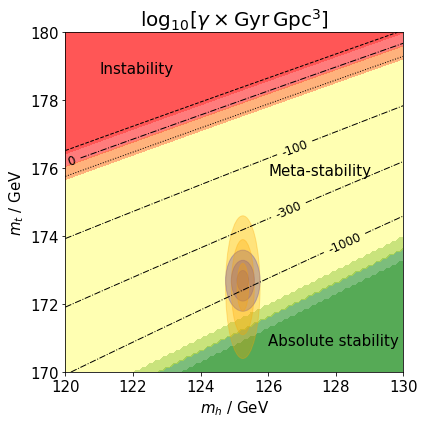

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat

# data info
DATE_LABEL = "2306"
MTMC = 172.69
MTMC_ERR = 0.3
MTPOLE = 172.5
MTPOLE_ERR = 0.7
MH = 125.25
MH_ERR = 0.17

# # data info
# DATE_LABEL = "1803"
# MTMC = 173.1
# MTMC_ERR = 0.6
# MH = 125.09
# MH_ERR = 0.24

# plot settings
MT_MIN = 170
MT_MAX = 180
MH_MIN = 120
MH_MAX = 130
nPts = 100

# figure settings
fig = plt.figure(figsize=[6,6])

# subfigure
ax = fig.add_subplot(1,1,1)

# data input
data = np.loadtxt("../output/" + DATE_LABEL + ".dat", usecols=range(5), delimiter='\t', 
)
mt = data[:,0]
mh = data[:,1]
log10gamma = data[:,2]
log10gamma_plus = data[:,3]
log10gamma_minus = data[:,4]

# reshape 1D to 2D
X, Y, Z = mh.reshape(nPts+1,nPts+1), mt.reshape(nPts+1,nPts+1), log10gamma.reshape(nPts+1,nPts+1)
Zp, Zm = log10gamma_plus.reshape(nPts+1,nPts+1), log10gamma_minus.reshape(nPts+1,nPts+1)

# contour plot (line / area)
DBL_MAX = 1.797693e+308 # used for absolute stability
cs = ax.contour(X, Y, Z, levels=[-1000, -300, -100, 0], colors='black', linewidths=1, linestyles='-.')
ax.contour(X, Y, Zp, levels=[-2*DBL_MAX,0], colors='black', linewidths=1, linestyles='--')
ax.contour(X, Y, Zm, levels=[-2*DBL_MAX,0], colors='black', linewidths=1, linestyles=':')
ax.contourf(X, Y, Z, levels=[-2*DBL_MAX,-0.5*DBL_MAX], alpha=0.3, colors='green')
ax.contourf(X, Y, Zm, levels=[-2*DBL_MAX,-0.5*DBL_MAX], alpha=0.3, colors='green')
ax.contourf(X, Y, Zp, levels=[-2*DBL_MAX,-0.5*DBL_MAX], alpha=0.3, colors='green')
ax.contourf(X, Y, Z, levels=[-0.5*DBL_MAX, -3], alpha=0.3, colors='yellow')
ax.contourf(X, Y, Z, levels=[-3, DBL_MAX], alpha=0.3, colors='red')
ax.contourf(X, Y, Zp, levels=[-3, DBL_MAX], alpha=0.3, colors='red')
ax.contourf(X, Y, Zm, levels=[-3, DBL_MAX], alpha=0.3, colors='red')

# contour small label
ax.clabel(cs, fmt='%d', fontsize=12)

# physical parameters
for sigma in range(1, 4):
  e = pat.Ellipse(xy=(MH, MTMC), width=2*sigma*MH_ERR, height=2*sigma*MTMC_ERR, alpha=0.3, color="blue")
  ax.add_patch(e)

# annotation
ax.text(x=121, y=178.8, s="Instability", fontsize=15)
ax.text(x=126, y=175.8, s="Meta-stability", fontsize=15)
ax.text(x=126, y=170.8, s="Absolute stability", fontsize=15)

# plot range
ax.set_xlim(MH_MIN, MH_MAX)
ax.set_ylim(MT_MIN, MT_MAX)

# ticks setting
ax.set_title(r"$\log_{10} [\gamma \times {\rm Gyr}\,{\rm Gpc}^3]$", fontsize=20)
ax.tick_params(labelsize=15)

# figure captions
ax.set_xlabel(r"$m_h$ / GeV", size=15)
ax.set_ylabel(r"$m_t$ / GeV", size=15)

plt.tight_layout()
plt.savefig('phase_diagram_'+DATE_LABEL+'.pdf', bbox_inches='tight')

# add pole mass measurement result
if DATE_LABEL == '2306':
  for sigma in range(1, 4):
    e = pat.Ellipse(xy=(MH, MTPOLE), width=2*sigma*MH_ERR, height=2*sigma*MTPOLE_ERR, alpha=0.3, color="orange")
    ax.add_patch(e)
  plt.savefig('phase_diagram_'+DATE_LABEL+'_mtpole.pdf', bbox_inches='tight')
